# A Brief discussion about the problem statement

Profit Prediction with Machine Learning:-->

   The profit earned by a company for a particular period depends on several factors like how much time and money a company spends on R&D, marketing and many more. So for predicting the profit of a company for a particular period we need to train a machine learning model with a dataset that contains historical data about the profit generated by the company.

   The task of predicting profit is an important task for every business to set an achievable goal. For example, if the business  spends 500000 on marketing, it can’t expect a profit of 20,0000000. Likewise, there are many other factors on which the profit of a business depends. A company must therefore set a goal that can be achieved. In the section below, I will walk you through the task of profit prediction with machine learning using Python.


The dataset that I am using for the task of profit prediction includes data about the R&D spend, Administration cost, Marketing Spend, and the historical profit generated by 50 startups. So let’s start with the task of profit prediction by importing the necessary Python libraries and the dataset:

# Table of contents

# 1.Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 2.Reading the data from google drive

In [2]:
#https://drive.google.com/file/d/1Z7RKmScBO7n9vcDIG3Xeo853Ics4QFaF/view
dataset_path="https://drive.google.com/uc?export=download&id=1Z7RKmScBO7n9vcDIG3Xeo853Ics4QFaF"
data=pd.read_csv(dataset_path)

In [3]:
#Displaying first 5 records of the data
data.head() 

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
data.shape

(50, 4)

In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# 3.Correlation between data

In [7]:
data.corr() #Correlation between the data

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Clearly, We can see that profit is more correlated with R&D Spend and marketing spend as compared to administration.

# 4.Data visualizations

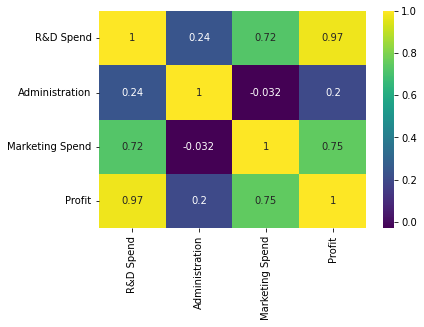

In [8]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

# 5.Univariate analysis

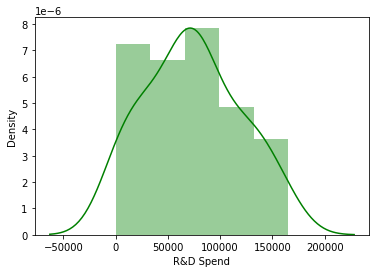

In [9]:
sns.distplot(data['R&D Spend'],color='green')
plt.show()

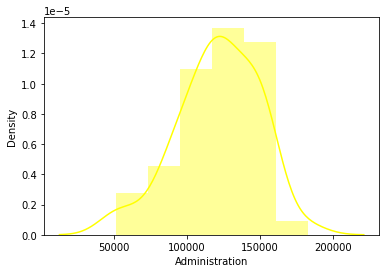

In [10]:
sns.distplot(data['Administration'],color='yellow')
plt.show()

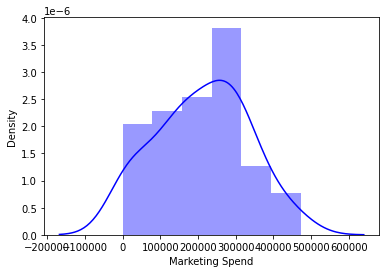

In [11]:
sns.distplot(data['Marketing Spend'],color='blue')
plt.show()

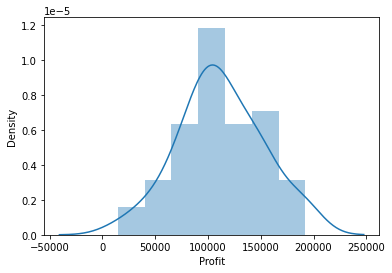

In [12]:
sns.distplot(data['Profit'])
plt.show()

All the features are almost Gaussian in nature

# 6.Bivariate analysis

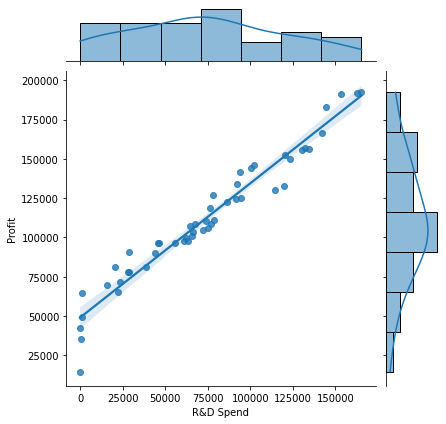

In [13]:
sns.jointplot(x='R&D Spend',y='Profit',kind='reg',data=data)
plt.show()

As we can see that Profit of a company increases as  R&D spends of a particular company increases.

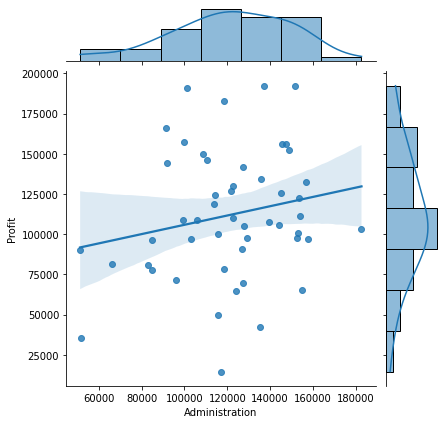

In [14]:
sns.jointplot(x='Administration',y='Profit',kind='reg',data=data)
plt.show()

There is not much more effect on profit as Administration spends as compared to R&D spends.

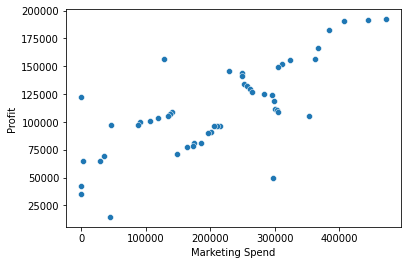

In [15]:
sns.scatterplot(x='Marketing Spend',y='Profit',data=data)
plt.show()

Marketing spends is a linear relationship with profit.

# 7.Separating the data into X and y

In [16]:
X=data.drop(columns='Profit',axis=1)
y=data['Profit']

In [17]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [18]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# 8.Scaling the data

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=['R&D Spend','Administration','Marketing Spend'])
X.head()

,R&D Spend,Administration,Marketing Spend
0,1.000000,0.651744,1.000000
1,0.983359,0.761972,0.940893
2,0.927985,0.379579,0.864664
3,0.873136,0.512998,0.812235
4,0.859438,0.305328,0.776136


In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# 9.Applying the machine learning models

In [21]:
lr=LinearRegression(fit_intercept=True)
rfg=RandomForestRegressor(n_estimators=150,criterion='squared_error',random_state=28)
gbr=GradientBoostingRegressor(loss='squared_error',learning_rate=0.01, n_estimators=88,criterion='squared_error')
xgb=XGBRegressor(n_estimators=130,learning_rate=0.05,random_state=20)
cat=CatBoostRegressor(iterations=502,learning_rate=0.01,loss_function='RMSE')

In [22]:
reg={
    
    'Linear Regression':lr,
    'Random Forest':rfg,
    'Gradient Boosting':gbr,
    'Xg Boost':xgb,
    'Cat Boost':cat
    
    }

In [23]:
reg.keys()

dict_keys(['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Xg Boost', 'Cat Boost'])

In [24]:
def regressor(x,y):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)
    
    for key in reg.keys():
        reg[key].fit(X_train,y_train)
        y_pred=reg[key].predict(X_test)
        score=r2_score(y_test,y_pred)
        
        print(key,'------>>>',score)

In [25]:
%%time
regressor(X,y)

Linear Regression ------>>> 0.9604774705502481
Random Forest ------>>> 0.9529069852016784
Gradient Boosting ------>>> 0.7337702642076452
Xg Boost ------>>> 0.8877151889524597
0:	learn: 39921.8302808	total: 56.8ms	remaining: 28.5s
1:	learn: 39736.1482911	total: 57.2ms	remaining: 14.3s
2:	learn: 39551.7188412	total: 57.4ms	remaining: 9.55s
3:	learn: 39374.2170020	total: 57.7ms	remaining: 7.18s
4:	learn: 39162.7964256	total: 58ms	remaining: 5.77s
5:	learn: 38992.7534317	total: 58.2ms	remaining: 4.81s
6:	learn: 38793.6130681	total: 58.5ms	remaining: 4.13s
7:	learn: 38583.1469382	total: 58.7ms	remaining: 3.63s
8:	learn: 38435.3609405	total: 59ms	remaining: 3.23s
9:	learn: 38301.0487948	total: 59.2ms	remaining: 2.91s
10:	learn: 38084.6010306	total: 59.4ms	remaining: 2.65s
11:	learn: 37896.3589544	total: 59.7ms	remaining: 2.44s
12:	learn: 37719.8755681	total: 60ms	remaining: 2.26s
13:	learn: 37560.3386785	total: 60.3ms	remaining: 2.1s
14:	learn: 37377.9848486	total: 60.6ms	remaining: 1.97s
15

Here, we can see that Linear regression and random forest gives us maximum r2_score of 96.04% and 95.2% respectively.

# 10.Custom prediction by using a ML model

In [26]:
input_data=(149020.45,80002.20,434907.15)
input_data=np.asarray(input_data).reshape(1,-1)
input_data

array([[149020.45,  80002.2 , 434907.15]])

In [27]:
input_data=scaler.transform(input_data)
input_data

array([[0.90124688, 0.21862463, 0.92183511]])

In [28]:
prediction=lr.predict(input_data)
prediction

array([179457.61302656])

Hence, We have calculated the expected profit of a company by using linear regression

# 11.Summary

  So this is how we can predict the profit of a company for a particular period by using machine learning algorithms. Such tasks can help a company to set a target that can be achieved. I hope you liked this project on the task of profit prediction with machine learning using Python.